#### 1. 社交网络构建与分析
##### a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
##### b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [4]:
import json
import networkx as nx
from pprint import pprint

with open(r'D:\ggit\abcd\hw4_data.json', 'r') as f:
    data = json.load(f)

nodes = data['nodes']
edges = data['edges']

G = nx.Graph()

for node in nodes:
    G.add_node(node[0], influence=node[1])

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

adjacency_dict = {node: list(G.neighbors(node)) for node in G.nodes}
print("社交关系网络（用邻接字典表示）：")
pprint( adjacency_dict)


direct_friends = {node: list(G.neighbors(node)) for node in G.nodes}
print("每个用户的直接朋友:")
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")



社交关系网络（用邻接字典表示）：
{'Aarebecca': ['Yanyan-Wang',
               'pomelo-nwu',
               'yangzy0603',
               'yvonneyx',
               'lidongze0629',
               'tyn1998',
               'RackweLLizm',
               'yikenie',
               'yubo0923',
               'Maple0817',
               'frank-zsy'],
 'Maple0817': ['pomelo-nwu',
               'Aarebecca',
               'Yanyan-Wang',
               'yangzy0603',
               'lidongze0629',
               'tyn1998',
               'yvonneyx',
               'RackweLLizm',
               'yikenie',
               'yubo0923',
               'frank-zsy'],
 'PureNatural': ['bifenglin',
                 'xgdyp',
                 'tyn1998',
                 'frank-zsy',
                 'will-ww',
                 'Zzzzzhuzhiwei',
                 'birdflyi',
                 'zhicheng-ning',
                 'xiaoya-yaya',
                 'andyhuang18',
                 'lhbvvvvv',
                 'stevendin

#### 2. 统计与度中心性分析
##### a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
##### b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
##### c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）

In [7]:
#度数
degree_dict = {node: G.degree(node) for node in G.nodes}

top_5_users = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("度数最多的前 5 个用户及其朋友数量:")
for user, degree in top_5_users:
    print(f"{user}: {degree}")



# 构建影响力字典
influence_dict = {user[0]: user[1] for user in nodes}


top_5_influencers = sorted(influence_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("影响力最高的前 5 个用户:")
for user, score in top_5_influencers:
    print(f"{user}: {score}")

# 综合影响力得分和朋友数量
impact_scores = {
    user: (influence_dict[user] * 0.5 + degree_dict[user] * 0.5)
    for user in G.nodes
}

top_5_impact_users = sorted(impact_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("对社交网络最有影响力的前 5 个用户:")
for user, score in top_5_impact_users:
    print(f"{user}: {score:.2f}")


度数最多的前 5 个用户及其朋友数量:
tyn1998: 30
frank-zsy: 30
pomelo-nwu: 24
andyhuang18: 23
wj23027: 23
影响力最高的前 5 个用户:
Yanyan-Wang: 50.95
Aarebecca: 23.82
pomelo-nwu: 22.36
tyn1998: 16.64
frank-zsy: 15.8
对社交网络最有影响力的前 5 个用户:
Yanyan-Wang: 32.48
tyn1998: 23.32
pomelo-nwu: 23.18
frank-zsy: 22.90
Aarebecca: 17.41


#### 3. 推荐新朋友
##### a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
##### b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序

In [18]:
target_user = "Yanyan-Wang"
friends_of_target = set(G.neighbors(target_user))

friends_of_friends = set()
for friend in friends_of_target:
    friends_of_friends.update(G.neighbors(friend))

# 移除目标用户及其直接朋友，得到候选新朋友
potential_friends = friends_of_friends - friends_of_target - {target_user}
# 共同朋友的数量
common_friends_count = {
    potential_friend: len(friends_of_target.intersection(G.neighbors(potential_friend)))
    for potential_friend in potential_friends
}
recommended_friends = sorted(common_friends_count.items(), key=lambda x: x[1], reverse=True)[:5]

print("推荐的新朋友（共同好友最多）:")
for friend, count in recommended_friends:
    print(f"{friend}: 与 Yanyan-Wang有{count}个共同好友")


target_user = "Yanyan-Wang"
connections = G[target_user]  # 获取 Yanyan-Wang 的连接信息
sorted_connections = sorted(connections.items(), key=lambda x: x[1]['weight'], reverse=True)[:5]

print("与 Yanyan-Wang 连接强度最高的 5 个用户（推荐排序）：")
for idx, (user, data) in enumerate(sorted_connections, start=1):
    print(f"{idx}. {user}: 连接强度 {data['weight']}")

推荐的新朋友（共同好友最多）:
birdflyi: 与 Yanyan-Wang有6个共同好友
Zzzzzhuzhiwei: 与 Yanyan-Wang有6个共同好友
longyanz: 与 Yanyan-Wang有6个共同好友
lhbvvvvv: 与 Yanyan-Wang有6个共同好友
xgdyp: 与 Yanyan-Wang有6个共同好友
与 Yanyan-Wang 连接强度最高的 5 个用户（推荐排序）：
1. Aarebecca: 连接强度 25.3
2. pomelo-nwu: 连接强度 25.09
3. yangzy0603: 连接强度 11.85
4. tyn1998: 连接强度 9.62
5. yvonneyx: 连接强度 7.39


#### 4. 网络图的可视化
##### a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
##### b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

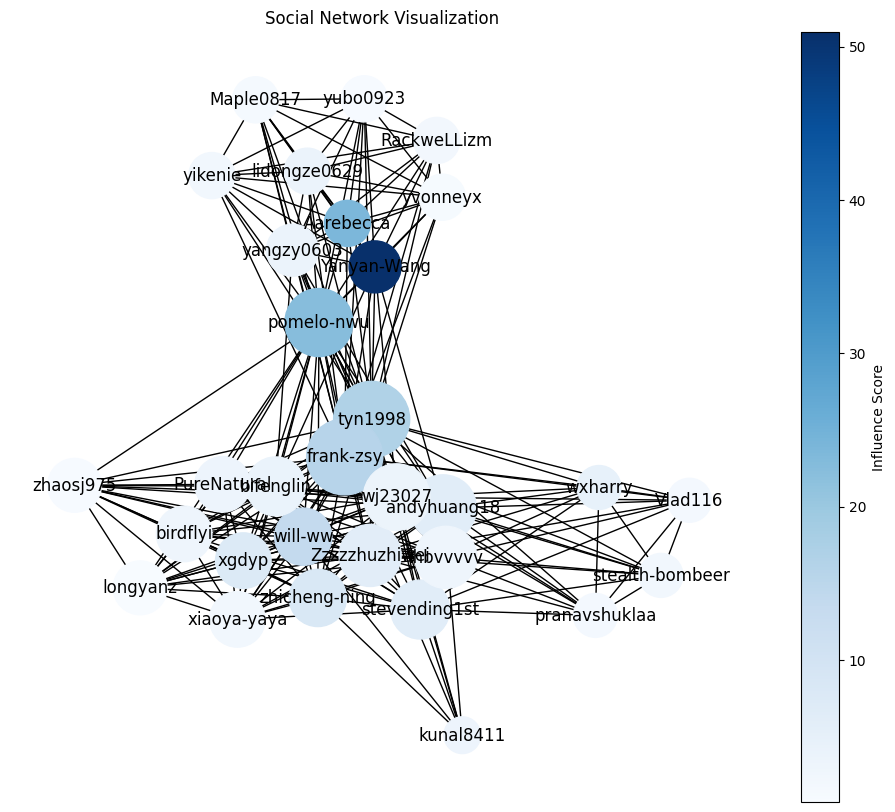

In [23]:
import matplotlib.pyplot as plt

node_color = [G.nodes[node]['influence'] for node in G.nodes]
node_size = [G.degree(node) * 100 for node in G.nodes]  # 节点大小与度数成正比

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G) 

nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues)
edges = nx.draw_networkx_edges(G, pos)
labels = nx.draw_networkx_labels(G, pos)

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Influence Score') 

plt.title("Social Network Visualization")
plt.axis('off') 
plt.show()

